Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3479 - val_loss: 0.1619
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.1523 - val_loss: 0.1265
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1222 - val_loss: 0.1083
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1065 - val_loss: 0.0976
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0964 - val_loss: 0.0902
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0898 - val_loss: 0.0851
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0852 - val_loss: 0.0816
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0818 - val_loss: 0.0792
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0795 - val_loss: 0.0775
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0781 - val_loss: 0.0764
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0769 - val_loss: 0.0756
Epoch 12/100
235/235 ━━━━━━━━━

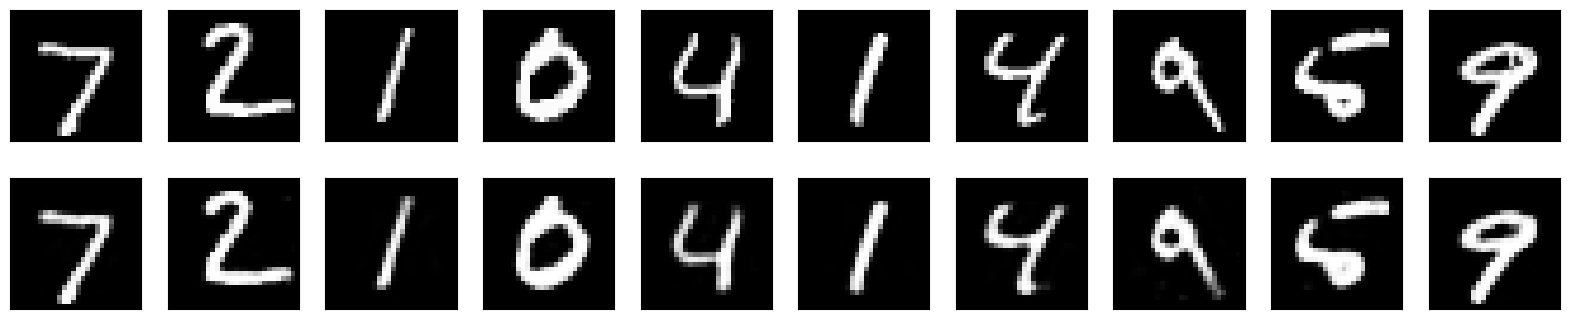

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into vectors of size 784 (28x28)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the input and encoding layers
input_dim = 784  # Example for flattened 28x28 images (like MNIST)
encoding_dim = 64  # Dimensionality of latent space

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,  # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restores model to best weights with the lowest validation loss


autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=100,  # Set a high number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[early_stopping])  # Add the early stopping callback

# Encoder model for extracting compressed representations
encoder = Model(input_img, encoded)

# Get encoded and decoded images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3519 - val_loss: 0.1620
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1525 - val_loss: 0.1272
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1233 - val_loss: 0.1081
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1066 - val_loss: 0.0970
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0965 - val_loss: 0.0902
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0897 - val_loss: 0.0850
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0852 - val_loss: 0.0816
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0820 - val_loss: 0.0793
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0796 - val_loss: 0.0777
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0781 - val_loss: 0.0764
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0770 - val_loss: 0.0755
Epoch 12/100
235/235 ━━━━━━━━━

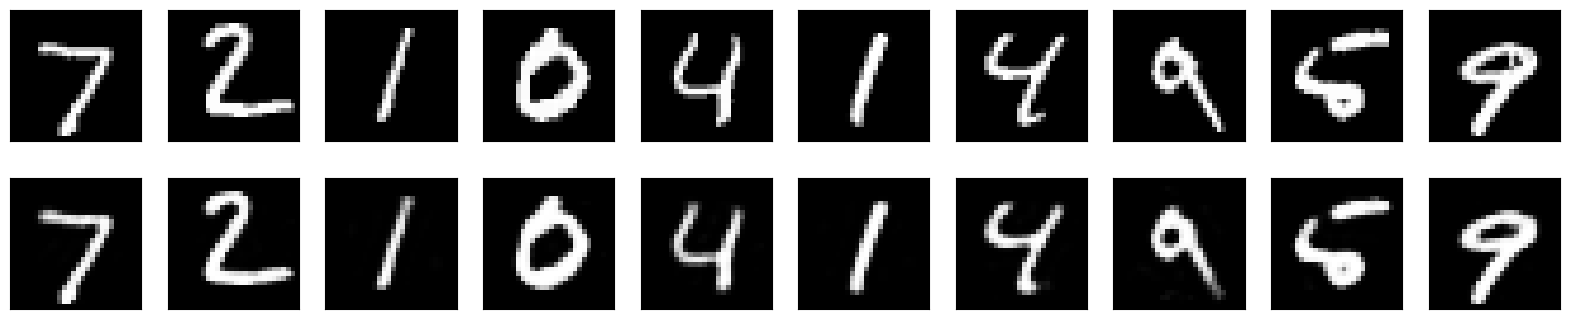

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import TerminateOnNaN

import matplotlib.pyplot as plt
import numpy as np

# Define the TerminateOnNaN callback
terminate_on_nan = TerminateOnNaN()

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into vectors of size 784 (28x28)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the input and encoding layers
input_dim = 784  # Example for flattened 28x28 images (like MNIST)
encoding_dim = 64  # Dimensionality of latent space

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=100,  # Set the number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[terminate_on_nan])  # Add the TerminateOnNaN callback


# Encoder model for extracting compressed representations
encoder = Model(input_img, encoded)

# Get encoded and decoded images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3430 - val_loss: 0.1613
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1524 - val_loss: 0.1269
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1231 - val_loss: 0.1088
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1070 - val_loss: 0.0977
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0969 - val_loss: 0.0904
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0900 - val_loss: 0.0854
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0851 - val_loss: 0.0817
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0817 - val_loss: 0.0792
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0795 - val_loss: 0.0775
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0780 - val_loss: 0.0764
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0769 - val_loss: 0.0756
Epoch 12/100
235/235 ━━━━━━━━━

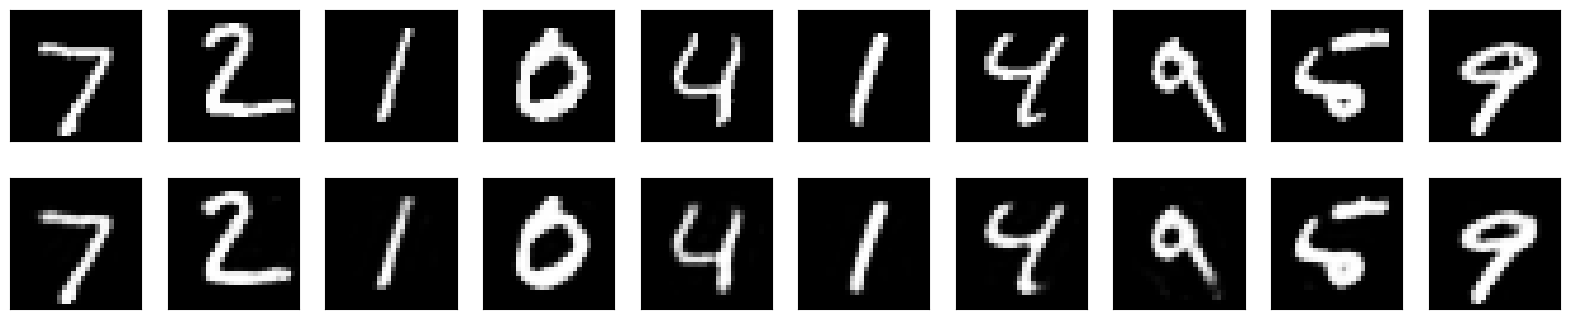

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import TerminateOnNaN

import matplotlib.pyplot as plt
import numpy as np

# Define the TerminateOnNaN callback
terminate_on_nan = TerminateOnNaN()

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into vectors of size 784 (28x28)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the input and encoding layers
input_dim = 784  # Example for flattened 28x28 images (like MNIST)
encoding_dim = 64  # Dimensionality of latent space

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training with multiple callbacks
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[terminate_on_nan, early_stopping])  # Using both callbacks


# Encoder model for extracting compressed representations
encoder = Model(input_img, encoded)

# Get encoded and decoded images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/50
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3531
Epoch 1: val_loss improved from inf to 0.16156, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3522 - val_loss: 0.1616
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1523
Epoch 2: val_loss improved from 0.16156 to 0.12675, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1523 - val_loss: 0.1267
Epoch 3/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1233
Epoch 3: val_loss improved from 0.12675 to 0.10928, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1232 - val_loss: 0.1093
Epoch 4/50
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1074
Epoch 4: val_loss improved from 0.10928 to 0.09754, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.1074 - val_loss: 0.0975
Epoch 5/50
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0

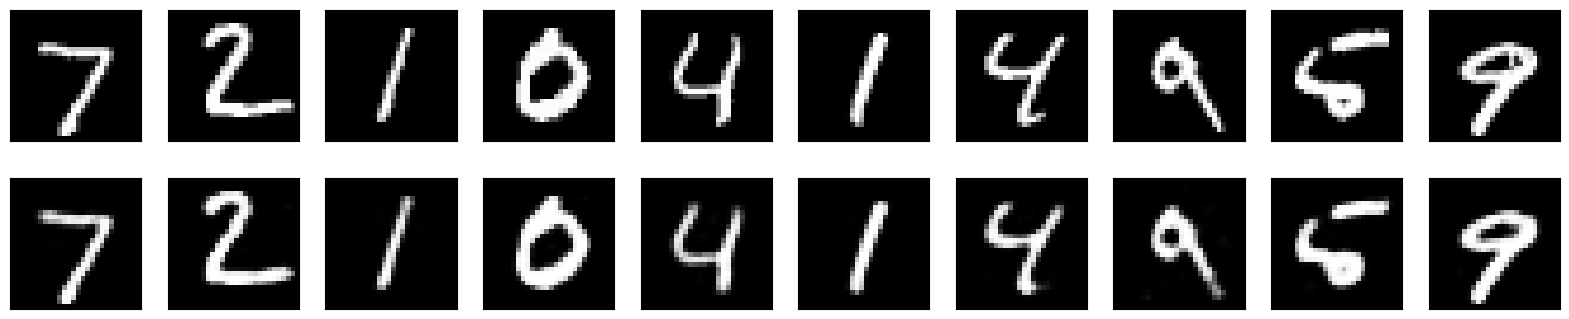

In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np


# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into vectors of size 784 (28x28)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the input and encoding layers
input_dim = 784  # Example for flattened 28x28 images (like MNIST)
encoding_dim = 64  # Dimensionality of latent space

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='autoencoder_best.keras',  # File path to save the model
                             monitor='val_loss',  # Metric to monitor
                             save_best_only=True,  # Save only the best model (based on the monitored metric)
                             mode='min',  # Minimize the monitored metric (e.g., validation loss)
                             save_weights_only=False,  # Save the entire model (set to True to save only weights)
                             verbose=1)  # Print a message when saving the model

# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=50,  # Number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),  # Validation data
                callbacks=[checkpoint])  # Add the ModelCheckpoint callback


# Encoder model for extracting compressed representations
encoder = Model(input_img, encoded)

# Get encoded and decoded images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/100
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3469
Epoch 1: val_loss improved from inf to 0.16187, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3456 - val_loss: 0.1619
Epoch 2/100
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1523
Epoch 2: val_loss improved from 0.16187 to 0.12614, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1522 - val_loss: 0.1261
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1224
Epoch 3: val_loss improved from 0.12614 to 0.10829, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1224 - val_loss: 0.1083
Epoch 4/100
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1067
Epoch 4: val_loss improved from 0.10829 to 0.09753, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1066 - val_loss: 0.0975
Epoch 5/100
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss

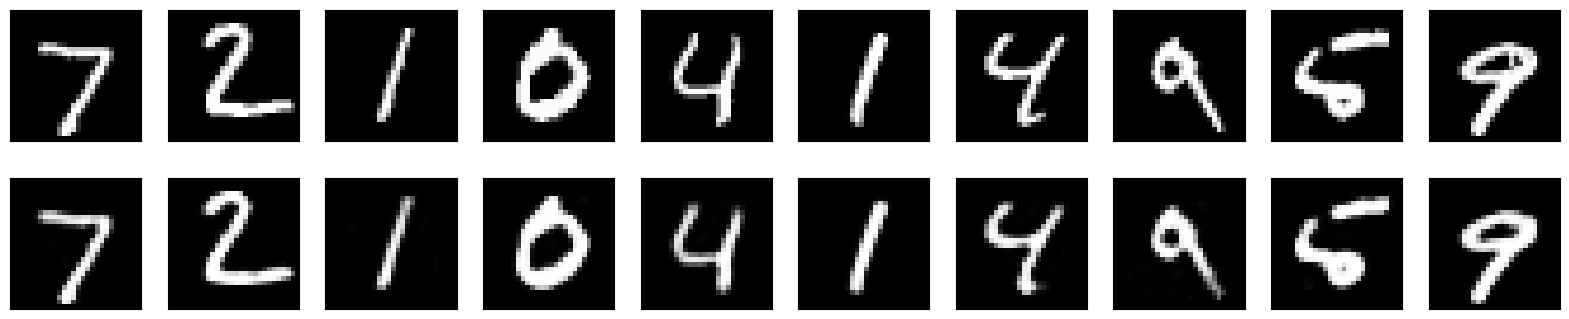

In [5]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, TerminateOnNaN

import matplotlib.pyplot as plt
import numpy as np

# EarlyStopping callback to stop training if validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# TerminateOnNaN callback to stop training if the loss becomes NaN
terminate_on_nan = TerminateOnNaN()

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into vectors of size 784 (28x28)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the input and encoding layers
input_dim = 784  # Example for flattened 28x28 images (like MNIST)
encoding_dim = 64  # Dimensionality of latent space

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Training with multiple callbacks
autoencoder.fit(x_train, x_train,
                epochs=100,  # You can set a high number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[checkpoint, early_stopping, terminate_on_nan])  # Using multiple callbacks


# Encoder model for extracting compressed representations
encoder = Model(input_img, encoded)

# Get encoded and decoded images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3555
Epoch 1: val_loss improved from inf to 0.16423, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.3537 - val_loss: 0.1642
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1542
Epoch 2: val_loss improved from 0.16423 to 0.12760, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1542 - val_loss: 0.1276
Epoch 3/50
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1232
Epoch 3: val_loss improved from 0.12760 to 0.10901, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1232 - val_loss: 0.1090
Epoch 4/50
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1072
Epoch 4: val_loss improved from 0.10901 to 0.09784, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1072 - val_loss: 0.0978
Epoch 5/50
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0

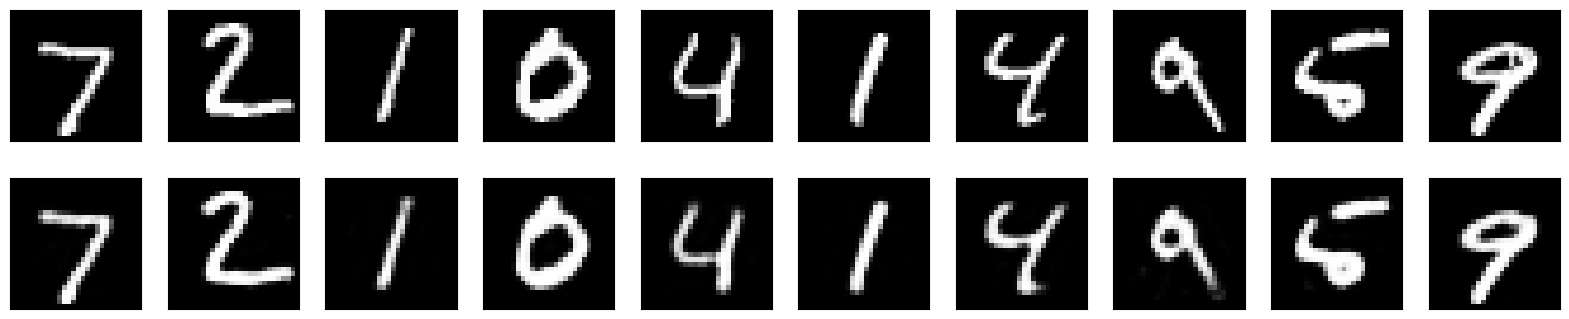

In [6]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np


# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into vectors of size 784 (28x28)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the input and encoding layers
input_dim = 784  # Example for flattened 28x28 images (like MNIST)
encoding_dim = 64  # Dimensionality of latent space

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='autoencoder_best.keras',  # File path to save the model
                             monitor='val_loss',  # Metric to monitor
                             save_best_only=True,  # Save only the best model (based on the monitored metric)
                             mode='min',  # Minimize the monitored metric (e.g., validation loss)
                             save_weights_only=False,  # Save the entire model (set to True to save only weights)
                             verbose=1)  # Print a message when saving the model

# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=50,  # Number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),  # Validation data
                callbacks=[checkpoint])  # Add the ModelCheckpoint callback

# Load the entire model
best_autoencoder = load_model('autoencoder_best.keras')


# Encoder model for extracting compressed representations
encoder = Model(input_img, encoded)

# Get encoded and decoded images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3497 - val_loss: 0.1614 - learning_rate: 0.0010
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1520 - val_loss: 0.1270 - learning_rate: 0.0010
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.1226 - val_loss: 0.1077 - learning_rate: 0.0010
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1059 - val_loss: 0.0966 - learning_rate: 0.0010
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0961 - val_loss: 0.0895 - learning_rate: 0.0010
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0892 - val_loss: 0.0846 - learning_rate: 0.0010
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0845 - val_loss: 0.0812 - learning_rate: 0.0010
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0814 - val_loss: 0.0789 - learning_rate: 0.0010
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0792 - val_loss: 0.0773 - learning_rate: 0.0010
E

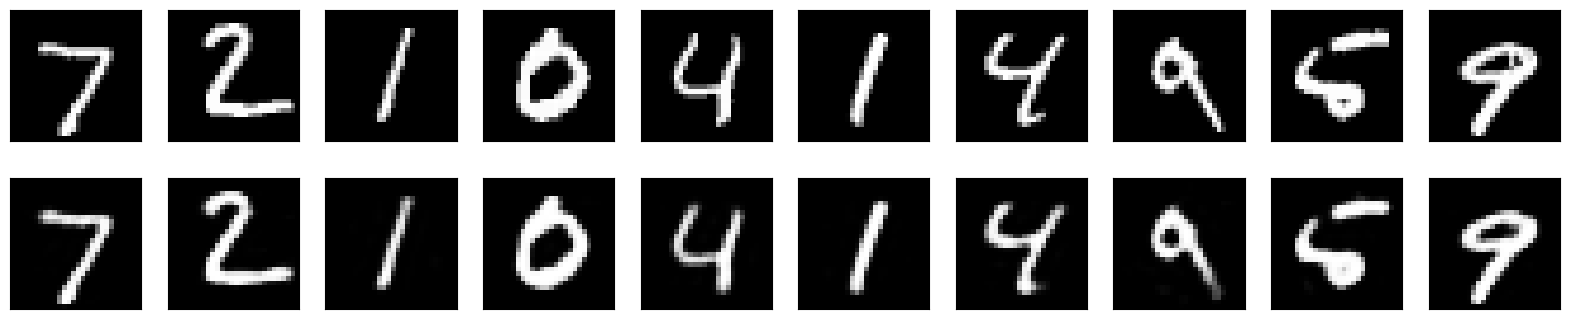

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt
import numpy as np


# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into vectors of size 784 (28x28)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the input and encoding layers
input_dim = 784  # Example for flattened 28x28 images (like MNIST)
encoding_dim = 64  # Dimensionality of latent space

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Metric to monitor
                              factor=0.5,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
                              patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
                              min_lr=1e-6,  # Lower bound for the learning rate
                              verbose=1)  # Print message when the learning rate is reduced

# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=50,  # Number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),  # Validation data
                callbacks=[reduce_lr])  # Add the ReduceLROnPlateau callback


# Encoder model for extracting compressed representations
encoder = Model(input_img, encoded)

# Get encoded and decoded images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3503
Epoch 1: val_loss improved from inf to 0.16073, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.3498 - val_loss: 0.1607 - learning_rate: 0.0010
Epoch 2/100
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1515
Epoch 2: val_loss improved from 0.16073 to 0.12602, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1513 - val_loss: 0.1260 - learning_rate: 0.0010
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1222
Epoch 3: val_loss improved from 0.12602 to 0.10748, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1222 - val_loss: 0.1075 - learning_rate: 0.0010
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1057
Epoch 4: val_loss improved from 0.10748 to 0.09670, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.1057 - val_l

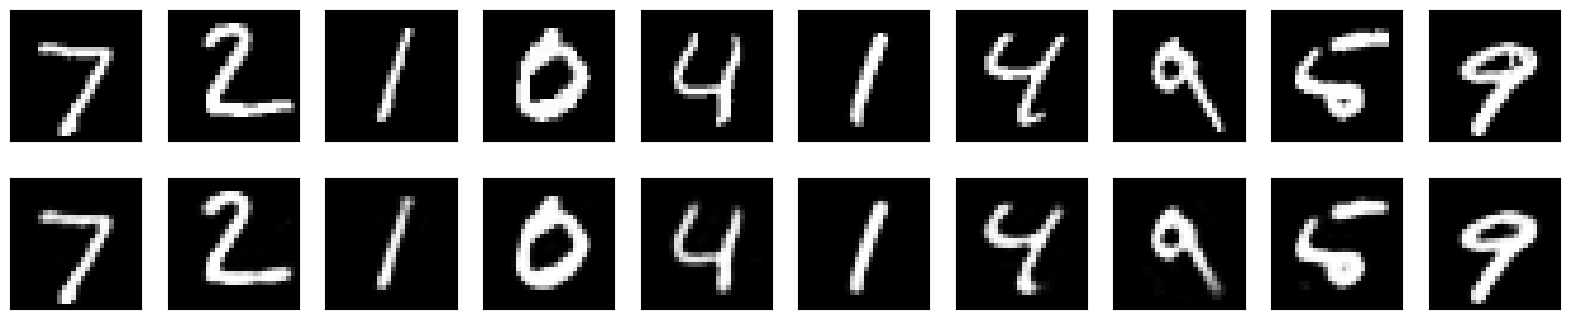

In [8]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TerminateOnNaN


import matplotlib.pyplot as plt
import numpy as np

# EarlyStopping callback to stop training if validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint(filepath='autoencoder_best.keras', monitor='val_loss', save_best_only=True, verbose=1)

# TerminateOnNaN callback to stop training if the loss becomes NaN
terminate_on_nan = TerminateOnNaN()

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into vectors of size 784 (28x28)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the input and encoding layers
input_dim = 784  # Example for flattened 28x28 images (like MNIST)
encoding_dim = 64  # Dimensionality of latent space

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# Training with multiple callbacks
autoencoder.fit(x_train, x_train,
                epochs=100,  # You can set a high number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[reduce_lr, early_stopping, checkpoint, terminate_on_nan])  # Using multiple callbacks


# Encoder model for extracting compressed representations
encoder = Model(input_img, encoded)

# Get encoded and decoded images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()